In [1]:
# Célula 1: Instalação de bibliotecas
!pip install tensorflow opencv-python mtcnn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.9 MB/s eta 0:00:00


In [2]:
# Célula 2: Importação de bibliotecas
import cv2
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
import tensorflow as tf # Apenas para verificar a versão por enquanto

print(f"TensorFlow Version: {tf.__version__}")
print(f"OpenCV Version: {cv2.__version__}")

TensorFlow Version: 2.18.0
OpenCV Version: 4.11.0


Imagem carregada com sucesso!


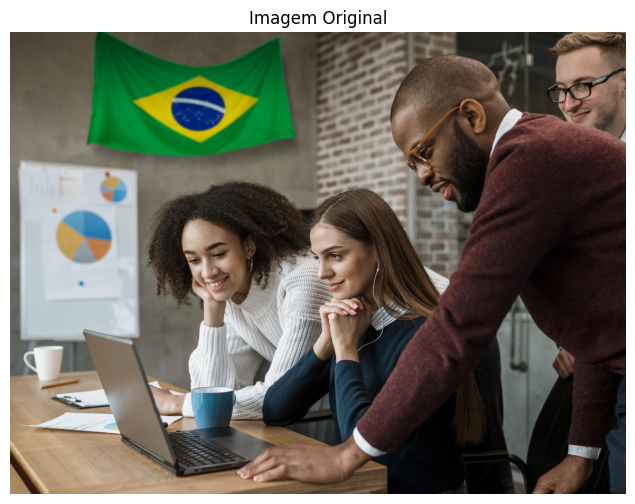

In [3]:
# Célula 3: Carregar e exibir imagem de teste
# Substitua 'teste_faces.jpg' pelo nome do seu arquivo se for diferente
image_path = 'teste_faces.jpg'

# Carregar a imagem usando OpenCV
# OpenCV carrega imagens em formato BGR (Blue, Green, Red) por padrão
img_bgr = cv2.imread(image_path)

if img_bgr is None:
    print(f"Erro: Não foi possível carregar a imagem em '{image_path}'. Verifique o caminho e o arquivo.")
else:
    print("Imagem carregada com sucesso!")
    # Converter de BGR para RGB (Red, Green, Blue) para exibição correta com Matplotlib
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Exibir a imagem
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title("Imagem Original")
    plt.axis('off') # Remove os eixos
    plt.show()

In [4]:
# Célula 4: Detectar faces com MTCNN
if 'img_rgb' not in globals() or img_rgb is None:
    print("Erro: A imagem não foi carregada no Passo 2. Execute a Célula 3 primeiro.")
else:
    # Inicializar o detector MTCNN
    detector = MTCNN()

    # Detectar faces na imagem (em formato RGB)
    print("Detectando faces...")
    faces = detector.detect_faces(img_rgb)
    print(f"Foram detectadas {len(faces)} face(s).")

    # 'faces' é uma lista de dicionários, onde cada dicionário contém:
    # 'box': [x, y, width, height] da caixa delimitadora
    # 'confidence': confiança da detecção (0 a 1)
    # 'keypoints': dicionário com posições de 'left_eye', 'right_eye', 'nose', 'mouth_left', 'mouth_right'

    # Imprimir as informações das faces detectadas (opcional, para depuração)
    for i, face_info in enumerate(faces):
        print(f"  Face {i+1}:")
        print(f"    Box: {face_info['box']}")
        print(f"    Confiança: {face_info['confidence']:.4f}")
        # print(f"    Keypoints: {face_info['keypoints']}") # Descomente se quiser ver os keypoints

Detectando faces...
Foram detectadas 3 face(s).
  Face 1:
    Box: [3877, 2501, 783, 1006]
    Confiança: 1.0000
  Face 2:
    Box: [2265, 2520, 767, 933]
    Confiança: 1.0000
  Face 3:
    Box: [7081, 351, 739, 915]
    Confiança: 0.9955


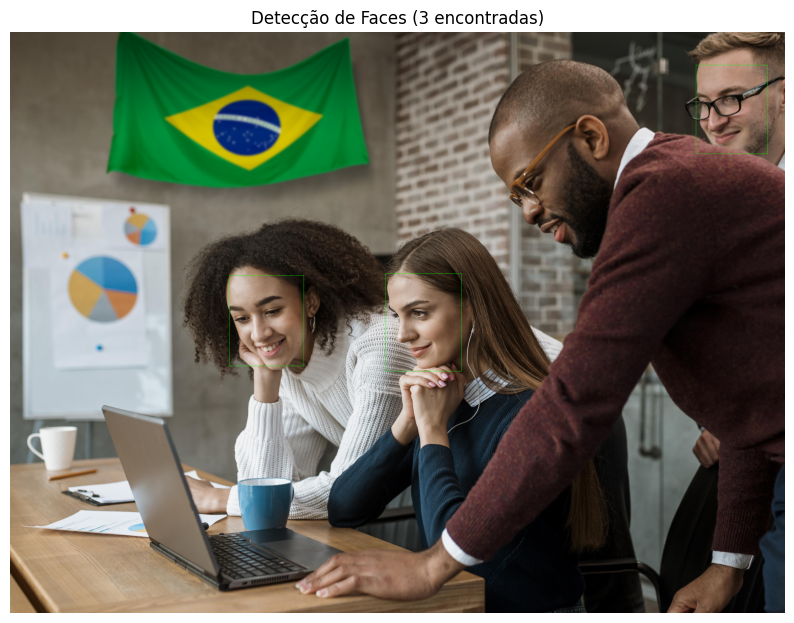

In [5]:
# Célula 5: Desenhar caixas delimitadoras nas faces detectadas
if 'img_rgb' not in globals() or img_rgb is None:
    print("Erro: A imagem não foi carregada no Passo 2. Execute a Célula 3 primeiro.")
elif 'faces' not in globals():
    print("Erro: As faces não foram detectadas no Passo 3. Execute a Célula 4 primeiro.")
else:
    # Fazer uma cópia da imagem original para desenhar
    # Lembre-se que OpenCV usa BGR, então vamos usar img_bgr para desenhar e depois converter se necessário
    img_with_detections_bgr = img_bgr.copy() # Usar a imagem BGR original carregada pelo cv2.imread

    for face_info in faces:
        # Extrair as coordenadas da caixa delimitadora
        x, y, width, height = face_info['box']
        # Desenhar o retângulo na imagem
        # cv2.rectangle(imagem, ponto_inicial, ponto_final, cor_em_bgr, espessura_da_linha)
        cv2.rectangle(img_with_detections_bgr, (x, y), (x + width, y + height), (0, 255, 0), 2) # Cor verde (BGR)

        # Opcional: Desenhar os keypoints (se quiser)
        # keypoints = face_info['keypoints']
        # cv2.circle(img_with_detections_bgr, (keypoints['left_eye']), 2, (0,0,255), 2)
        # cv2.circle(img_with_detections_bgr, (keypoints['right_eye']), 2, (0,0,255), 2)
        # cv2.circle(img_with_detections_bgr, (keypoints['nose']), 2, (0,0,255), 2)
        # cv2.circle(img_with_detections_bgr, (keypoints['mouth_left']), 2, (0,0,255), 2)
        # cv2.circle(img_with_detections_bgr, (keypoints['mouth_right']), 2, (0,0,255), 2)

    # Converter a imagem com detecções de BGR para RGB para exibição com Matplotlib
    img_with_detections_rgb = cv2.cvtColor(img_with_detections_bgr, cv2.COLOR_BGR2RGB)

    # Exibir a imagem com as detecções
    plt.figure(figsize=(10, 8))
    plt.imshow(img_with_detections_rgb)
    plt.title(f"Detecção de Faces ({len(faces)} encontradas)")
    plt.axis('off')
    plt.show()

In [6]:
# Célula 6: Instalar keras-facenet
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=b04db25088882a8de353b0d6c52ce4145aefcebe24c0c8389a1bad111bb575a8
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras-facenet


In [7]:
# Célula 7: Importar e inicializar FaceNet
from keras_facenet import FaceNet

# Inicializar o extrator de embeddings FaceNet
# A primeira vez que você executar, ele baixará os pesos do modelo (~90MB)
print("Inicializando o extrator FaceNet...")
embedder = FaceNet()
print("Extrator FaceNet inicializado.")

Inicializando o extrator FaceNet...
Extrator FaceNet inicializado.


In [8]:
# Célula 8: Função para extrair e pré-processar uma face
import numpy as np
from PIL import Image # Pillow para manipulação de imagem, especialmente redimensionamento

def extract_and_preprocess_face(image_rgb, box, required_size=(160, 160)):
    """
    Extrai uma face de uma imagem usando a caixa delimitadora e a pré-processa
    para o modelo FaceNet.

    Args:
        image_rgb (numpy.ndarray): A imagem completa em formato RGB.
        box (list): Lista [x, y, width, height] da caixa delimitadora da face.
        required_size (tuple): Tamanho desejado da imagem da face (largura, altura).

    Returns:
        numpy.ndarray: A imagem da face pré-processada e pronta para o FaceNet,
                       ou None se a face for inválida.
    """
    x, y, w, h = box

    # Lidar com coordenadas negativas (MTCNN às vezes pode dar x ou y < 0)
    x, y = abs(x), abs(y)

    # Recortar a face da imagem
    face_pixels = image_rgb[y : y + h, x : x + w]

    # Converter para objeto PIL.Image para redimensionamento fácil
    try:
        image_pil = Image.fromarray(face_pixels)
    except ValueError as e:
        print(f"Erro ao converter array para imagem PIL: {e}. Box: {box}, Shape: {face_pixels.shape}")
        # Isso pode acontecer se w ou h forem 0 ou negativos após o abs(), ou se a caixa estiver fora da imagem
        return None

    # Redimensionar para o tamanho exigido pelo FaceNet
    image_pil_resized = image_pil.resize(required_size)

    # Converter de volta para array numpy
    face_array = np.asarray(image_pil_resized)

    return face_array

print("Função extract_and_preprocess_face definida.")

Função extract_and_preprocess_face definida.


In [22]:
# Célula 9: Extrair embeddings das faces detectadas
import numpy as np # Certifique-se que numpy está importado

# Inicializar detected_face_embeddings como uma lista vazia no início da célula
# para evitar erros se nenhuma face for processada.
detected_face_embeddings = [] # IMPORTANTE: Inicializar aqui

if 'faces' not in globals() or not faces: # 'faces' vem da Célula 4 (detecções MTCNN)
    print("Erro: Nenhuma face detectada anteriormente (execute as Células 3 e 4).")
elif 'embedder' not in globals() or embedder is None: # 'embedder' vem da Célula 7 (FaceNet)
    print("Erro: Extrator FaceNet não inicializado (execute a Célula 7).")
elif 'extract_and_preprocess_face' not in globals(): # Função da Célula 8
    print("Erro: Função 'extract_and_preprocess_face' não definida (execute a Célula 8).")
elif 'img_rgb' not in globals() or img_rgb is None: # Imagem da Célula 3
    print("Erro: Imagem original (img_rgb) não encontrada. Execute a Célula 3 primeiro.")
else:
    processed_faces_for_embedding = [] # Lista para guardar as faces pré-processadas

    print(f"Processando {len(faces)} face(s) detectada(s) para extração de embeddings...")

    for i, face_info in enumerate(faces):
        print(f"  Processando face {i+1}...")
        box = face_info['box']

        # Extrair e pré-processar a face
        # Lembre-se de usar img_rgb (a imagem original em RGB)
        single_face_pixels = extract_and_preprocess_face(img_rgb, box) # Função da Célula 8

        if single_face_pixels is not None:
            processed_faces_for_embedding.append(single_face_pixels)
            print(f"    Face {i+1} pré-processada com shape: {single_face_pixels.shape}")
        else:
            print(f"    Aviso: Face {i+1} não pôde ser processada (verifique a função extract_and_preprocess_face).")

    if processed_faces_for_embedding:
        # Converter a lista de faces pré-processadas em um array NumPy
        samples = np.asarray(processed_faces_for_embedding, 'float32')
        print(f"  Shape do array de amostras para FaceNet: {samples.shape}")

        # Obter os embeddings usando o extrator FaceNet
        # O método 'embeddings' da Keras-FaceNet lida com a normalização e retorna uma lista de arrays de embedding
        detected_face_embeddings = embedder.embeddings(samples) # Isso retorna uma LISTA de embeddings

        print("\nEmbeddings extraídos:")
        for i, emb in enumerate(detected_face_embeddings):
            print(f"  Embedding da Face {i+1}: Shape={emb.shape}, Exemplo dos primeiros 5 valores: {emb[:5]}")
    else:
        print("Nenhuma face foi processada com sucesso para extração de embedding.")
        # Garantir que detected_face_embeddings seja uma lista vazia se nada foi processado
        detected_face_embeddings = []


# --- Bloco de DEBUG Corrigido ---
print(f"\n--- DEBUG INFO CÉLULA 9 ---")
if 'detected_face_embeddings' not in globals():
    print("'detected_face_embeddings' não foi definida.")
else:
    # A saída de embedder.embeddings() é uma LISTA de arrays numpy,
    # cada array sendo um embedding.
    if isinstance(detected_face_embeddings, list):
        print(f"Tipo de 'detected_face_embeddings': {type(detected_face_embeddings)}")
        if len(detected_face_embeddings) > 0:
            print(f"Número de embeddings detectados na imagem de teste: {len(detected_face_embeddings)}")
            # Assumindo que cada item na lista é um array numpy (o embedding em si)
            if isinstance(detected_face_embeddings[0], np.ndarray):
                first_shape = detected_face_embeddings[0].shape
                print(f"Shape do PRIMEIRO embedding da imagem de teste: {first_shape}")

                all_shapes_same = True
                for emb_idx in range(1, len(detected_face_embeddings)):
                    if not isinstance(detected_face_embeddings[emb_idx], np.ndarray) or \
                       detected_face_embeddings[emb_idx].shape != first_shape:
                        all_shapes_same = False
                        break
                if all_shapes_same:
                    print(f"Todos os {len(detected_face_embeddings)} embeddings de teste têm o shape: {first_shape}")
                else:
                    # Esta parte só será útil se os shapes puderem ser diferentes, o que não deveria acontecer com FaceNet
                    shapes_list = []
                    for item in detected_face_embeddings:
                        if isinstance(item, np.ndarray):
                            shapes_list.append(item.shape)
                        else:
                            shapes_list.append(type(item)) # Se não for array, mostrar o tipo
                    print(f"ATENÇÃO: Embeddings de teste têm shapes/tipos DIFERENTES! Lista: {shapes_list}")
            else:
                print(f"O primeiro item em 'detected_face_embeddings' não é um array NumPy. Tipo: {type(detected_face_embeddings[0])}")
        else:
            print("'detected_face_embeddings' é uma lista vazia.")
    elif isinstance(detected_face_embeddings, np.ndarray):
        # Este caso é menos provável para a saída direta de keras-facenet .embeddings()
        # mas incluído por robustez se a variável for modificada depois.
        print(f"Tipo de 'detected_face_embeddings': {type(detected_face_embeddings)}")
        print(f"Shape do array 'detected_face_embeddings': {detected_face_embeddings.shape}")
        if detected_face_embeddings.size == 0:
            print("'detected_face_embeddings' (array NumPy) está vazio.")
    else:
        print(f"Tipo inesperado para 'detected_face_embeddings': {type(detected_face_embeddings)}")

print(f"--- FIM DEBUG INFO CÉLULA 9 ---\n")

Processando 3 face(s) detectada(s) para extração de embeddings...
  Processando face 1...
    Face 1 pré-processada com shape: (160, 160, 3)
  Processando face 2...
    Face 2 pré-processada com shape: (160, 160, 3)
  Processando face 3...
    Face 3 pré-processada com shape: (160, 160, 3)
  Shape do array de amostras para FaceNet: (3, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step

Embeddings extraídos:
  Embedding da Face 1: Shape=(512,), Exemplo dos primeiros 5 valores: [ 0.00014584  0.03349208 -0.05336628 -0.10395232  0.01164116]
  Embedding da Face 2: Shape=(512,), Exemplo dos primeiros 5 valores: [-0.04966161  0.00826653 -0.06033801  0.01005505  0.03533382]
  Embedding da Face 3: Shape=(512,), Exemplo dos primeiros 5 valores: [-0.05287139  0.05964856 -0.06127227 -0.0137011   0.00324662]

--- DEBUG INFO CÉLULA 9 ---
Tipo de 'detected_face_embeddings': <class 'numpy.ndarray'>
Shape do array 'detected_face_embeddings': (3, 512)
--- FIM DEBUG INFO CÉLULA 9 ---



In [11]:
# Célula ANTES da Célula 10 (ou no início da Célula 10)
!apt-get install -y unrar # Instala o utilitário unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [16]:
# Célula 10: Descompactar o dataset de faces conhecidas
import zipfile
import os

zip_file_path = 'dataset_conhecidos.zip' # Certifique-se que este é o nome do seu arquivo zip
extract_to_path = 'dataset_conhecidos_extracted' # Nome da pasta onde será extraído

if os.path.exists(zip_file_path):
    # Criar o diretório de extração se não existir
    if not os.path.exists(extract_to_path):
        os.makedirs(extract_to_path)

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
    print(f"Dataset '{zip_file_path}' descompactado em '{extract_to_path}'.")

    # Listar o conteúdo para verificação (opcional)
    print("\nConteúdo da pasta extraída:")
    for dirname, _, filenames in os.walk(extract_to_path):
        for filename in filenames:
            # Imprimir apenas alguns para não poluir a saída se houver muitos arquivos
            if dirname.count(os.sep) < extract_to_path.count(os.sep) + 2: # Limita a profundidade da listagem
                 print(os.path.join(dirname, filename))
else:
    print(f"Erro: Arquivo '{zip_file_path}' não encontrado. Faça o upload do arquivo zip primeiro.")

Dataset 'dataset_conhecidos.zip' descompactado em 'dataset_conhecidos_extracted'.

Conteúdo da pasta extraída:


In [17]:
# Célula 11: Processar faces conhecidas e gerar embeddings
import glob # Para encontrar arquivos de imagem
import numpy as np # Certifique-se que numpy está importado, se já não estiver globalmente
import os # Já deve estar importado
import cv2 # Já deve estar importado

known_face_embeddings = []
known_face_names = []

# --- Certifique-se que esta variável aponta para a pasta correta ---
dataset_base_path = 'dataset_conhecidos_extracted/dataset_conhecidos' # Caminho para a pasta extraída

if not os.path.exists(dataset_base_path):
    print(f"Erro: A pasta do dataset '{dataset_base_path}' não existe. Verifique a Célula 10.")
elif 'detector' not in globals() or detector is None: # Verificar se detector está definido
    print("Erro: Detector MTCNN não inicializado (provavelmente da Célula 4). Execute-a primeiro.")
elif 'embedder' not in globals() or embedder is None: # Verificar se embedder está definido
    print("Erro: Extrator FaceNet não inicializado (provavelmente da Célula 7). Execute-a primeiro.")
elif 'extract_and_preprocess_face' not in globals(): # Verificar se a função helper está definida
    print("Erro: Função 'extract_and_preprocess_face' não definida (provavelmente da Célula 8). Execute-a primeiro.")
else:
    print(f"Processando dataset em: {dataset_base_path}")
    # Iterar sobre cada subpasta de pessoa no dataset
    for person_name_folder in os.listdir(dataset_base_path):
        person_path = os.path.join(dataset_base_path, person_name_folder)

        # Adicionar verificação se o item dentro de dataset_base_path é realmente uma pasta
        # E se o nome da pasta não começa com '.' (como .ipynb_checkpoints que o Colab pode criar)
        if os.path.isdir(person_path) and not person_name_folder.startswith('.'):
            person_name = person_name_folder # O nome da pasta é o nome da pessoa
            print(f"\nProcessando imagens para: {person_name}")

            # Encontrar todas as imagens (.jpg, .png, .jpeg) na pasta da pessoa
            image_files = []
            for ext in ('*.jpg', '*.jpeg', '*.png'):
                image_files.extend(glob.glob(os.path.join(person_path, ext)))
            # Tratamento para extensões em maiúsculas também
            for ext_upper in ('*.JPG', '*.JPEG', '*.PNG'):
                image_files.extend(glob.glob(os.path.join(person_path, ext_upper)))

            # Remover duplicatas se houver (caso .jpg e .JPG existam com mesmo nome base)
            image_files = list(set(image_files))


            if not image_files:
                print(f"  Aviso: Nenhuma imagem encontrada para {person_name} em {person_path}")
                continue

            for image_file in image_files:
                print(f"  Lendo imagem: {os.path.basename(image_file)}") # Mostrar só o nome do arquivo
                ref_img_bgr = cv2.imread(image_file)
                if ref_img_bgr is None:
                    print(f"    Aviso: Não foi possível ler a imagem {image_file}")
                    continue

                ref_img_rgb = cv2.cvtColor(ref_img_bgr, cv2.COLOR_BGR2RGB)
                ref_faces_detected = detector.detect_faces(ref_img_rgb)

                if not ref_faces_detected:
                    print(f"    Aviso: Nenhuma face detectada em {os.path.basename(image_file)} para {person_name}.")
                    continue

                # Lógica para selecionar a face correta (ex: maior face, ou a com maior confiança)
                # Por simplicidade, vamos pegar a primeira com confiança razoável.
                # Poderia ser melhorado para pegar a maior face se várias forem detectadas.
                best_face = None
                max_confidence = 0.0 # Ou max_area = 0
                for face_candidate in ref_faces_detected:
                    if face_candidate['confidence'] > 0.90: # Limiar de confiança inicial
                         if face_candidate['confidence'] > max_confidence: # Poderia ser por área: face_candidate['box'][2] * face_candidate['box'][3]
                            best_face = face_candidate
                            max_confidence = face_candidate['confidence']

                if best_face is None:
                    print(f"    Aviso: Nenhuma face com confiança suficiente (>0.90) detectada em {os.path.basename(image_file)} para {person_name}.")
                    continue

                ref_box = best_face['box']
                ref_confidence = best_face['confidence']

                face_pixels = extract_and_preprocess_face(ref_img_rgb, ref_box)

                if face_pixels is not None:
                    face_pixels_expanded = np.expand_dims(face_pixels, axis=0)
                    face_pixels_expanded = np.asarray(face_pixels_expanded, 'float32')
                    embedding = embedder.embeddings(face_pixels_expanded)[0]

                    known_face_embeddings.append(embedding)
                    known_face_names.append(person_name)
                    print(f"    Embedding gerado para {person_name} de {os.path.basename(image_file)}. Conf: {ref_confidence:.2f}. Shape: {embedding.shape}")
                else:
                    print(f"    Aviso: Não foi possível processar a face de {os.path.basename(image_file)} para {person_name}.")

    print(f"\nProcessamento do dataset concluído.")
    if known_face_embeddings:
        print(f"Total de embeddings conhecidos: {len(known_face_embeddings)}")
        unique_names_found = np.unique(known_face_names)
        print(f"Nomes correspondentes: {len(unique_names_found)} pessoas únicas ({unique_names_found})")
        known_face_embeddings = np.asarray(known_face_embeddings)
        known_face_names = np.asarray(known_face_names)
    else:
        print("\nATENÇÃO: Nenhum embedding conhecido foi gerado. Verifique seu dataset, as imagens e as mensagens de aviso.")
        print("Possíveis causas: ")
        print("  - Nenhuma imagem encontrada nas subpastas do dataset.")
        print("  - Nenhuma face detectada nas imagens de referência (verifique a qualidade das fotos).")
        print("  - Faces detectadas com confiança abaixo do limiar (atualmente >0.90).")
        print("  - Problemas ao pré-processar as faces.")

Processando dataset em: dataset_conhecidos_extracted/dataset_conhecidos

Processando imagens para: dataset_conhecidos_Pessoa_A
  Lendo imagem: teste_faces.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
    Embedding gerado para dataset_conhecidos_Pessoa_A de teste_faces.jpg. Conf: 1.00. Shape: (512,)

Processando imagens para: dataset_conhecidos_Pessoa_B
  Lendo imagem: Imagem_pessoa_B.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
    Embedding gerado para dataset_conhecidos_Pessoa_B de Imagem_pessoa_B.jpg. Conf: 1.00. Shape: (512,)

Processamento do dataset concluído.
Total de embeddings conhecidos: 2
Nomes correspondentes: 2 pessoas únicas (['dataset_conhecidos_Pessoa_A' 'dataset_conhecidos_Pessoa_B'])


In [15]:
# Célula de Inspeção: Listar conteúdo do dataset processado
import os

base_path_inspecao = 'dataset_conhecidos_extracted/dataset_conhecidos'

print(f"Inspecionando o conteúdo de: {base_path_inspecao}")
if not os.path.exists(base_path_inspecao):
    print(f"ERRO: O caminho '{base_path_inspecao}' não existe!")
else:
    for item_raiz in os.listdir(base_path_inspecao):
        caminho_item_raiz = os.path.join(base_path_inspecao, item_raiz)
        print(f"\nEncontrado na raiz de '{base_path_inspecao}': {item_raiz} (É diretório? {os.path.isdir(caminho_item_raiz)})")

        if os.path.isdir(caminho_item_raiz) and not item_raiz.startswith('.'):
            print(f"  Conteúdo de '{item_raiz}':")
            if not os.listdir(caminho_item_raiz):
                print("    Pasta vazia.")
            else:
                for sub_item in os.listdir(caminho_item_raiz):
                    caminho_sub_item = os.path.join(caminho_item_raiz, sub_item)
                    print(f"    - {sub_item} (É diretório? {os.path.isdir(caminho_sub_item)})")
                    if os.path.isdir(caminho_sub_item) and not sub_item.startswith('.'): # Se houver outra subpasta inesperada
                         print(f"      Conteúdo de '{sub_item}' (sub-subpasta):")
                         for sub_sub_item in os.listdir(caminho_sub_item):
                             print(f"        -- {sub_sub_item}")

Inspecionando o conteúdo de: dataset_conhecidos_extracted/dataset_conhecidos

Encontrado na raiz de 'dataset_conhecidos_extracted/dataset_conhecidos': dataset_conhecidos_Pessoa_A (É diretório? True)
  Conteúdo de 'dataset_conhecidos_Pessoa_A':
    - teste_faces.jpg (É diretório? False)

Encontrado na raiz de 'dataset_conhecidos_extracted/dataset_conhecidos': dataset_conhecidos_Pessoa_B (É diretório? True)
  Conteúdo de 'dataset_conhecidos_Pessoa_B':
    Pasta vazia.


In [19]:
# Célula 12: Comparar embeddings e identificar faces
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# --- Verificação da existência e conteúdo das variáveis ---
embeddings_ok = True
if 'detected_face_embeddings' not in globals():
    print("Erro: Variável 'detected_face_embeddings' não encontrada. Execute a Célula 9.")
    embeddings_ok = False
# Se for uma lista de embeddings (como a Célula 9 provavelmente produz)
elif not isinstance(detected_face_embeddings, (list, np.ndarray)) or len(detected_face_embeddings) == 0:
    print("Erro: 'detected_face_embeddings' está vazia ou não é uma lista/array. Execute a Célula 9.")
    embeddings_ok = False
# Se for um único array numpy com vários embeddings como linhas (menos provável da Célula 9, mas para cobrir)
# elif isinstance(detected_face_embeddings, np.ndarray) and detected_face_embeddings.size == 0:
#    print("Erro: Array 'detected_face_embeddings' está vazio. Execute a Célula 9.")
#    embeddings_ok = False


if 'known_face_embeddings' not in globals():
    print("Erro: Variável 'known_face_embeddings' não encontrada. Execute a Célula 11.")
    embeddings_ok = False
elif not isinstance(known_face_embeddings, np.ndarray) or known_face_embeddings.size == 0:
    print("Erro: 'known_face_embeddings' está vazio ou não é um array NumPy. Execute a Célula 11.")
    embeddings_ok = False

if 'known_face_names' not in globals():
    print("Erro: Variável 'known_face_names' não encontrada. Execute a Célula 11.")
    embeddings_ok = False
elif not isinstance(known_face_names, np.ndarray) or known_face_names.size == 0:
    print("Erro: 'known_face_names' está vazio ou não é um array NumPy. Execute a Célula 11.")
    embeddings_ok = False
# --- Fim da verificação ---


if embeddings_ok:
    recognized_names = []
    recognition_confidences = []

    recognition_threshold_distance = 0.6 # Ajuste este valor conforme necessário

    print(f"Comparando {len(detected_face_embeddings)} face(s) detectada(s) na imagem de teste com {len(known_face_embeddings)} face(s) conhecidas.")
    print(f"Usando limiar de distância cosseno: < {recognition_threshold_distance}")

    # Certificar que detected_face_embeddings é uma lista de arrays 1D, ou um array 2D
    # e known_face_embeddings é um array 2D
    # A Célula 9 retorna uma lista de embeddings (cada um é um array 1D).
    # A Célula 11 retorna known_face_embeddings como um array 2D (N_pessoas, N_dimensões_embedding).

    for i, test_embedding in enumerate(detected_face_embeddings):
        # Garantir que test_embedding seja um array 1D e tenha o shape correto
        if not isinstance(test_embedding, np.ndarray) or test_embedding.ndim != 1:
            print(f"  Aviso: Embedding de teste {i+1} não é um array 1D válido. Ignorando.")
            recognized_names.append("Erro no Embedding de Teste")
            recognition_confidences.append(0.0)
            continue

        # test_embedding já deve ser (512,) ou (128,)
        # known_face_embeddings deve ser (num_known_faces, 512) ou (num_known_faces, 128)

        # Verificar consistência de dimensão (APENAS SE AMBOS TIVEREM DADOS)
        if known_face_embeddings.shape[1] != test_embedding.shape[0]:
            print(f"ERRO CRÍTICO: Dimensões de embedding inconsistentes!")
            print(f"  Shape do embedding de teste: {test_embedding.shape}")
            print(f"  Shape dos embeddings conhecidos (esperado N, {test_embedding.shape[0]}): {known_face_embeddings.shape}")
            print("  Interrompendo comparação. Verifique as Células 7, 9 e 11 para garantir o mesmo modelo FaceNet.")
            embeddings_ok = False # Sinaliza para não tentar desenhar na próxima célula
            break # Sai do loop for

        similarities = cosine_similarity(test_embedding.reshape(1, -1), known_face_embeddings)
        distances = 1 - similarities[0]

        min_distance_idx = np.argmin(distances)
        min_distance = distances[min_distance_idx]

        print(f"\n  Face de Teste {i+1}:")
        print(f"    Menor distância encontrada: {min_distance:.4f} (para '{known_face_names[min_distance_idx]}')")

        if min_distance < recognition_threshold_distance:
            recognized_name = known_face_names[min_distance_idx]
            confidence_score = 1 - min_distance
            recognized_names.append(recognized_name)
            recognition_confidences.append(confidence_score)
            print(f"    --> RECONHECIDA como: {recognized_name} (Similaridade: {confidence_score:.4f})")
        else:
            recognized_names.append("Desconhecido")
            recognition_confidences.append(1 - min_distance) # Mesmo se desconhecido, guardamos a similaridade com o mais próximo
            print(f"    --> DESCONHECIDO (Menor distância {min_distance:.4f} >= limiar {recognition_threshold_distance})")

    if not embeddings_ok: # Se o erro crítico de dimensão ocorreu
        print("Devido a erro de dimensão, o reconhecimento não foi concluído.")
    else:
        print("\nResultados do Reconhecimento:")
        for i, name in enumerate(recognized_names):
            # Evitar erro se recognized_names e recognition_confidences ficaram com tamanhos diferentes
            if i < len(recognition_confidences):
                print(f"  Face de Teste {i+1}: {name} (Conf/Similaridade com o mais próximo: {recognition_confidences[i]:.4f})")
            else:
                print(f"  Face de Teste {i+1}: {name} (Confiança não disponível)")

else:
    print("Pré-condições para reconhecimento não atendidas. Verifique as mensagens de erro acima.")

Comparando 3 face(s) detectada(s) na imagem de teste com 2 face(s) conhecidas.
Usando limiar de distância cosseno: < 0.6

  Face de Teste 1:
    Menor distância encontrada: 0.0000 (para 'dataset_conhecidos_Pessoa_A')
    --> RECONHECIDA como: dataset_conhecidos_Pessoa_A (Similaridade: 1.0000)

  Face de Teste 2:
    Menor distância encontrada: 0.8243 (para 'dataset_conhecidos_Pessoa_B')
    --> DESCONHECIDO (Menor distância 0.8243 >= limiar 0.6)

  Face de Teste 3:
    Menor distância encontrada: 0.8957 (para 'dataset_conhecidos_Pessoa_A')
    --> DESCONHECIDO (Menor distância 0.8957 >= limiar 0.6)

Resultados do Reconhecimento:
  Face de Teste 1: dataset_conhecidos_Pessoa_A (Conf/Similaridade com o mais próximo: 1.0000)
  Face de Teste 2: Desconhecido (Conf/Similaridade com o mais próximo: 0.1757)
  Face de Teste 3: Desconhecido (Conf/Similaridade com o mais próximo: 0.1043)


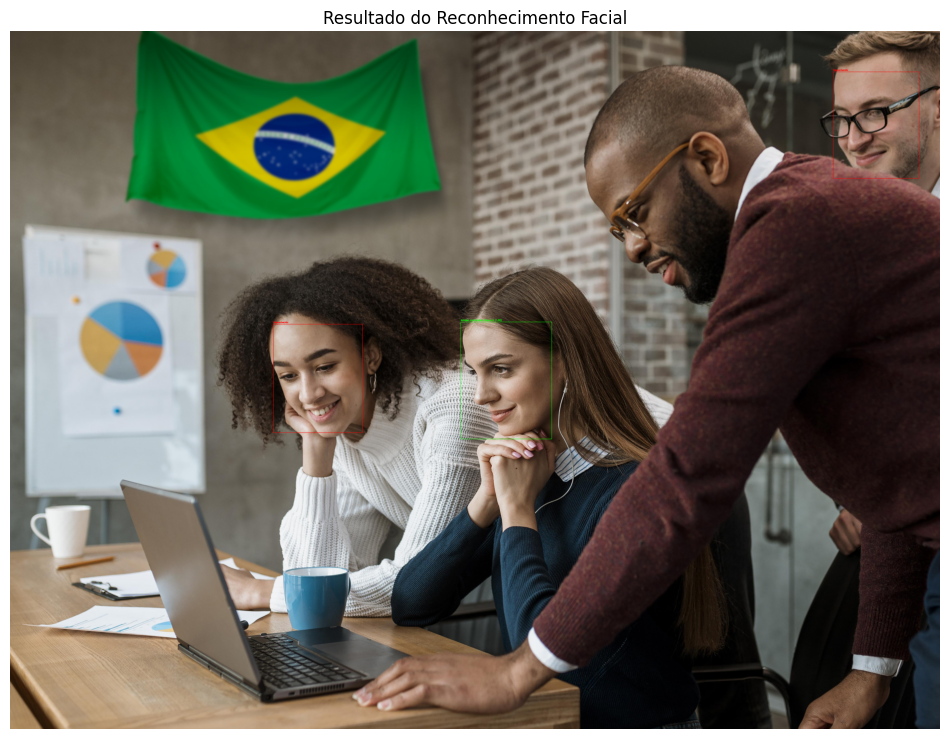

In [20]:
# Célula 13: Desenhar resultados na imagem
import cv2 # Já importado
import matplotlib.pyplot as plt # Já importado

# Verificações adicionadas para garantir que as variáveis existem
if 'img_bgr' not in globals() or img_bgr is None:
    print("Erro: Imagem original (img_bgr) não encontrada. Execute a Célula 3.")
elif 'faces' not in globals() or not faces:
    print("Erro: Informações de detecção de faces (MTCNN 'faces') não encontradas. Execute a Célula 4.")
elif 'recognized_names' not in globals():
    print("Erro: Lista 'recognized_names' não encontrada. Execute a Célula 12.")
elif 'recognition_confidences' not in globals():
    print("Erro: Lista 'recognition_confidences' não encontrada. Execute a Célula 12.")
elif len(recognized_names) != len(faces):
    print(f"Erro: Número de nomes reconhecidos ({len(recognized_names)}) não corresponde ao número de faces detectadas ({len(faces)}). Verifique Célula 4 e 12.")
elif len(recognition_confidences) != len(faces):
    print(f"Erro: Número de confianças ({len(recognition_confidences)}) não corresponde ao número de faces detectadas ({len(faces)}). Verifique Célula 4 e 12.")
else:
    img_with_recognition = img_bgr.copy()

    for i, face_info in enumerate(faces):
        box = face_info['box']
        x, y, w, h = box
        name = recognized_names[i]
        # Usar a similaridade (1 - distância) para exibição, que já está em recognition_confidences
        confidence_display = recognition_confidences[i]

        color = (0, 255, 0) if name != "Desconhecido" else (0, 0, 255) # Verde para conhecido, Vermelho para desconhecido

        cv2.rectangle(img_with_recognition, (x, y), (x + w, y + h), color, 2)

        if name != "Desconhecido":
            text = f"{name} ({confidence_display:.2f})"
        else:
            # Para "Desconhecido", podemos optar por não mostrar a confiança do "mais próximo"
            # ou mostrar, mas deixar claro que é apenas o mais próximo, não uma identificação.
            # Vamos manter simples por enquanto:
            text = "Desconhecido"
            # Se quiser mostrar a similaridade com o mais próximo mesmo para desconhecidos:
            # text = f"Desconhecido (Próximo: {confidence_display:.2f})"


        text_y_position = y - 10 if y - 10 > 10 else y + h + 20
        cv2.putText(img_with_recognition, text, (x, text_y_position),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2) # Ajustei um pouco o tamanho da fonte

    img_with_recognition_rgb = cv2.cvtColor(img_with_recognition, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 10))
    plt.imshow(img_with_recognition_rgb)
    plt.title("Resultado do Reconhecimento Facial")
    plt.axis('off')
    plt.show()